In [1]:
#Task 1: Analyze the correlation between job title keywords and offered salaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('all_upwork_jobs_2024-02-07-2024-03-24.csv')

In [3]:
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [4]:
df.dropna(subset=['title', 'budget'], inplace=True)

In [5]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['title'])

In [6]:
y = df['budget'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
corr_matrix = np.corrcoef(y_test, y_pred)
correlation = corr_matrix[0, 1]
print(f'Correlation between predicted and actual salaries: {correlation}')

Correlation between predicted and actual salaries: 0.07026769804094882


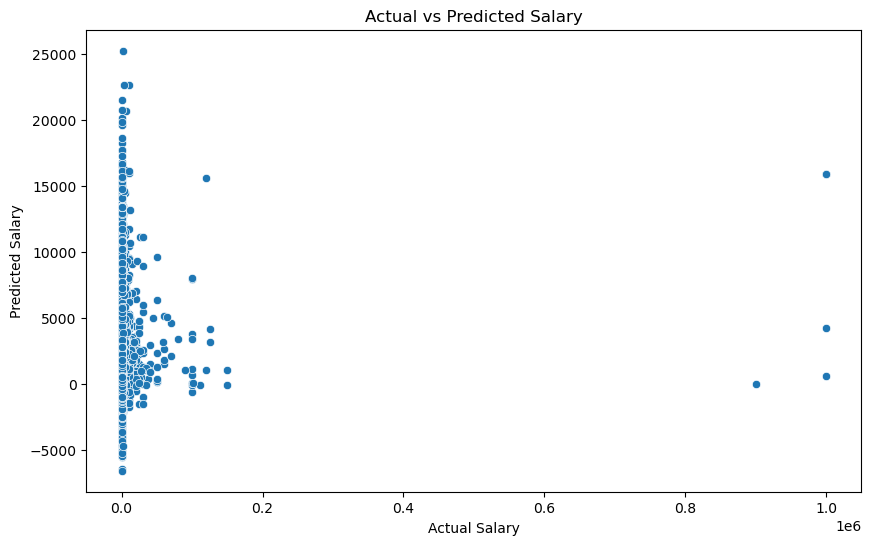

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

In [12]:
feature_importance = model.coef_
keywords = vectorizer.get_feature_names_out()

In [13]:
feature_df = pd.DataFrame({'Keyword': keywords, 'Importance': feature_importance})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

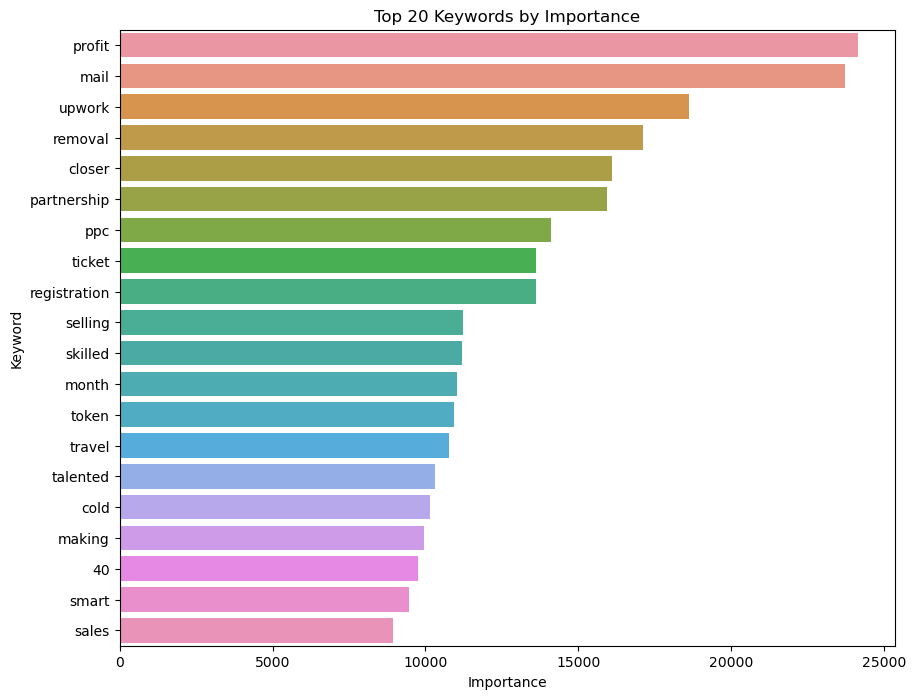

In [14]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Keyword', data=feature_df.head(20))
plt.title('Top 20 Keywords by Importance')
plt.show()

In [15]:
#Task 2: Identify emerging job categories based on posting frequency
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import datetime

In [16]:
df.dropna(subset=['title', 'published_date'], inplace=True)

In [17]:
df['published_date'] = pd.to_datetime(df['published_date'], utc=True).dt.tz_localize(None)

In [18]:
df['year_month'] = df['published_date'].dt.to_period('M')

In [19]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['title'])

In [20]:
nmf = NMF(n_components=10, random_state=1)
W = nmf.fit_transform(X)
H = nmf.components_

In [21]:
keywords = vectorizer.get_feature_names_out()
categories = []
for topic in H:
    top_keywords = [keywords[i] for i in topic.argsort()[:-11:-1]]
    categories.append(" ".join(top_keywords))

In [22]:
df['category'] = W.argmax(axis=1)
df['category_name'] = df['category'].apply(lambda x: categories[x])

In [23]:
category_trends = df.groupby(['year_month', 'category_name']).size().unstack(fill_value=0)

In [24]:
growth_rate = category_trends.pct_change().fillna(0)

In [25]:
recent_growth = growth_rate.iloc[-1].sort_values(ascending=False)
emerging_categories = recent_growth.head(10).index.tolist()

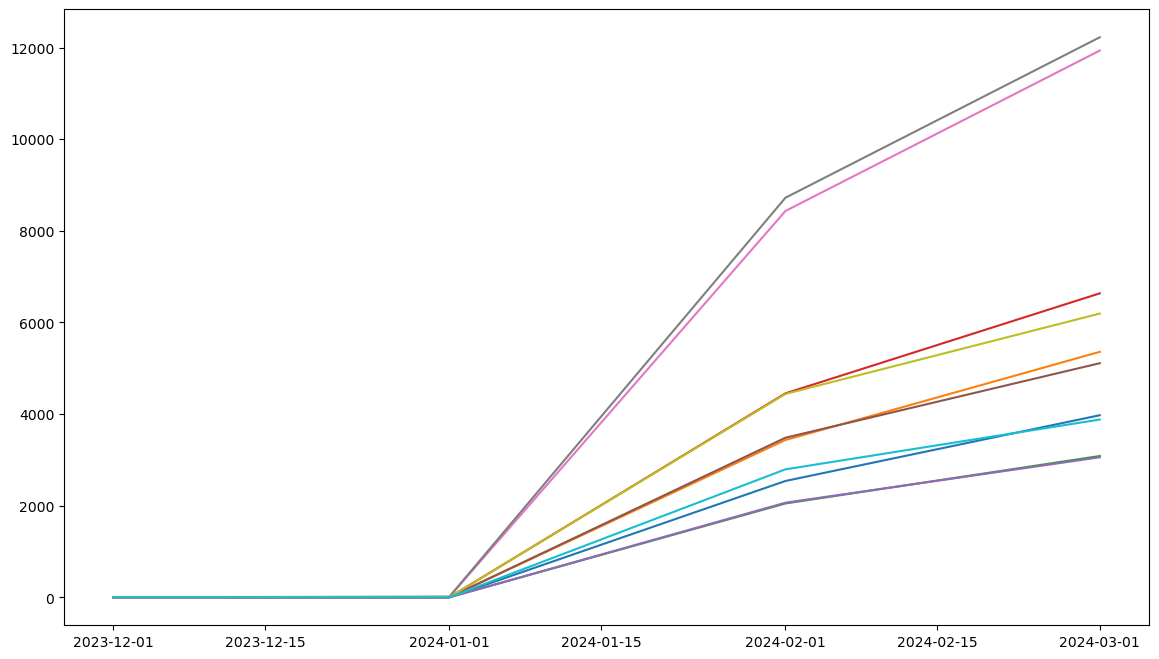

In [26]:
plt.figure(figsize=(14, 8))
for category in emerging_categories:
    plt.plot(category_trends.index.to_timestamp(), category_trends[category], label=category)

In [27]:
#Task 3: Predict high-demand job roles by analyzing job posting patterns over time
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,year_month,category,category_name
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54,False,NaN,NaN,500.0,NaN,2024-02,6,media social manager marketing content special...
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17,False,NaN,NaN,1100.0,United States,2024-02,3,developer web stack wordpress needed react sho...
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42,False,NaN,NaN,650.0,India,2024-02,5,expert needed seo data specialist google ads l...
6,Want to fix the WordPress Plugin,https://www.upwork.com/jobs/Want-fix-the-WordP...,2024-02-17 09:07:27,False,NaN,NaN,5.0,India,2024-02,2,website wordpress development seo build shopif...
9,PHP/HTML/CSS WordPress Developer Needed for We...,https://www.upwork.com/jobs/PHP-HTML-CSS-WordP...,2024-02-17 09:06:21,False,NaN,NaN,500.0,Canada,2024-02,2,website wordpress development seo build shopif...
...,...,...,...,...,...,...,...,...,...,...,...
244817,Set-up ASPEN process simulation in DWSIM,https://www.upwork.com/jobs/Set-ASPEN-process-...,2024-03-24 13:27:03,False,NaN,NaN,500.0,United Kingdom,2024-03,5,expert needed seo data specialist google ads l...
244819,API developer FastAPI,https://www.upwork.com/jobs/API-developer-Fast...,2024-03-24 13:55:22,False,NaN,NaN,600.0,India,2024-03,3,developer web stack wordpress needed react sho...
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52,False,NaN,NaN,100.0,Sri Lanka,2024-03,6,media social manager marketing content special...
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15,False,NaN,NaN,15.0,France,2024-03,2,website wordpress development seo build shopif...


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [29]:
X = df[['budget', 'category']]  # Features
y = df['budget']  # Target variable

In [30]:
X = pd.get_dummies(X, columns=['budget'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = rf_classifier.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         5.0       1.00      1.00      1.00      1219
         6.0       1.00      1.00      1.00        48
         7.0       1.00      1.00      1.00       107
         8.0       1.00      1.00      1.00        77
         9.0       1.00      1.00      1.00        20
        10.0       1.00      1.00      1.00      1182
        11.0       1.00      1.00      1.00        10
        12.0       1.00      1.00      1.00        64
        13.0       1.00      1.00      1.00        28
        14.0       1.00      1.00      1.00         9
        15.0       1.00      1.00      1.00       668
        16.0       1.00      1.00      1.00        10
        17.0       1.00      1.00      1.00        15
        18.0       1.00      1.00      1.00        18
        19.0       1.00      1.00      1.00         2
        20.0       1.00      1.00      1.00      1146
        21.0       1.00      1.00      1.00         4
        22.0       1.00    

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\metrics\

In [36]:
predictions = rf_classifier.predict(X)

In [37]:
df['predicted_high_demand'] = predictions

In [38]:
demand_trends = df.groupby(['budget'])['predicted_high_demand'].mean().reset_index()

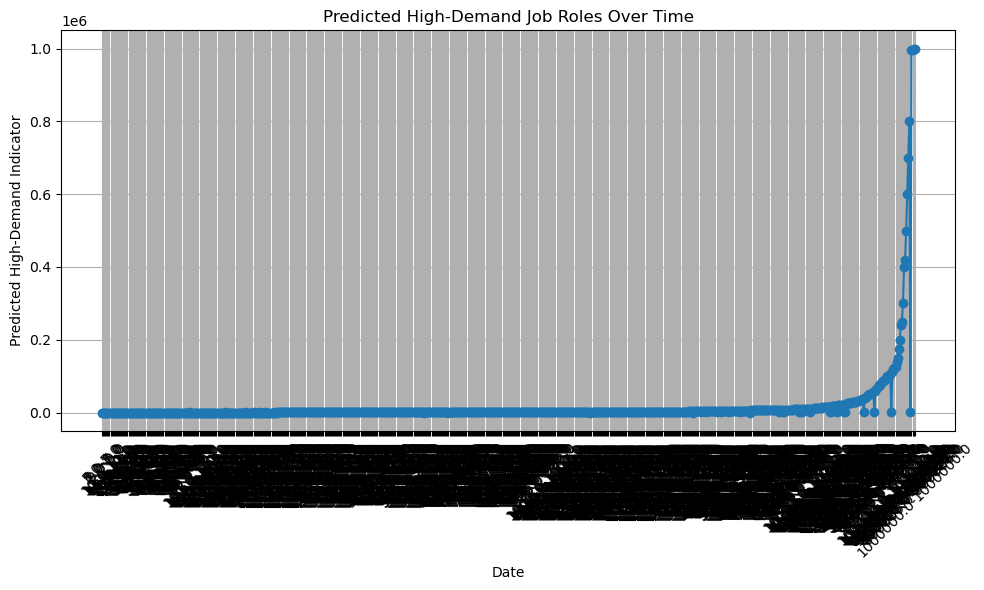

In [39]:
# Plotting demand trends
plt.figure(figsize=(10, 6))
plt.plot(demand_trends['budget'].astype(str) + '-' + demand_trends['budget'].astype(str), demand_trends['predicted_high_demand'], marker='o')
plt.title('Predicted High-Demand Job Roles Over Time')
plt.xlabel('Date')
plt.ylabel('Predicted High-Demand Indicator')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
#Task 4: Compare average hourly rates across different countries
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,year_month,category,category_name,predicted_high_demand
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54,False,NaN,NaN,500.0,NaN,2024-02,6,media social manager marketing content special...,500.0
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17,False,NaN,NaN,1100.0,United States,2024-02,3,developer web stack wordpress needed react sho...,1100.0
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42,False,NaN,NaN,650.0,India,2024-02,5,expert needed seo data specialist google ads l...,650.0
6,Want to fix the WordPress Plugin,https://www.upwork.com/jobs/Want-fix-the-WordP...,2024-02-17 09:07:27,False,NaN,NaN,5.0,India,2024-02,2,website wordpress development seo build shopif...,5.0
9,PHP/HTML/CSS WordPress Developer Needed for We...,https://www.upwork.com/jobs/PHP-HTML-CSS-WordP...,2024-02-17 09:06:21,False,NaN,NaN,500.0,Canada,2024-02,2,website wordpress development seo build shopif...,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
244817,Set-up ASPEN process simulation in DWSIM,https://www.upwork.com/jobs/Set-ASPEN-process-...,2024-03-24 13:27:03,False,NaN,NaN,500.0,United Kingdom,2024-03,5,expert needed seo data specialist google ads l...,500.0
244819,API developer FastAPI,https://www.upwork.com/jobs/API-developer-Fast...,2024-03-24 13:55:22,False,NaN,NaN,600.0,India,2024-03,3,developer web stack wordpress needed react sho...,600.0
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52,False,NaN,NaN,100.0,Sri Lanka,2024-03,6,media social manager marketing content special...,100.0
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15,False,NaN,NaN,15.0,France,2024-03,2,website wordpress development seo build shopif...,15.0


In [41]:
print(df.head())

                                               title  \
0  Experienced Media Buyer For Solar Pannel and R...   
1                               Full Stack Developer   
4                                      Data Engineer   
6                   Want to fix the WordPress Plugin   
9  PHP/HTML/CSS WordPress Developer Needed for We...   

                                                link      published_date  \
0  https://www.upwork.com/jobs/Experienced-Media-... 2024-02-17 09:09:54   
1  https://www.upwork.com/jobs/Full-Stack-Develop... 2024-02-17 09:09:17   
4  https://www.upwork.com/jobs/Data-Engineer_%7E0... 2024-02-17 09:07:42   
6  https://www.upwork.com/jobs/Want-fix-the-WordP... 2024-02-17 09:07:27   
9  https://www.upwork.com/jobs/PHP-HTML-CSS-WordP... 2024-02-17 09:06:21   

   is_hourly  hourly_low  hourly_high  budget        country year_month  \
0      False         NaN          NaN   500.0            NaN    2024-02   
1      False         NaN          NaN  1100.0  United St

In [42]:
df = df.dropna(subset=['hourly_high'])

In [43]:
average_hourly_rates = df.groupby('country')['hourly_high'].mean().reset_index()

In [44]:
print(average_hourly_rates)

Empty DataFrame
Columns: [country, hourly_high]
Index: []


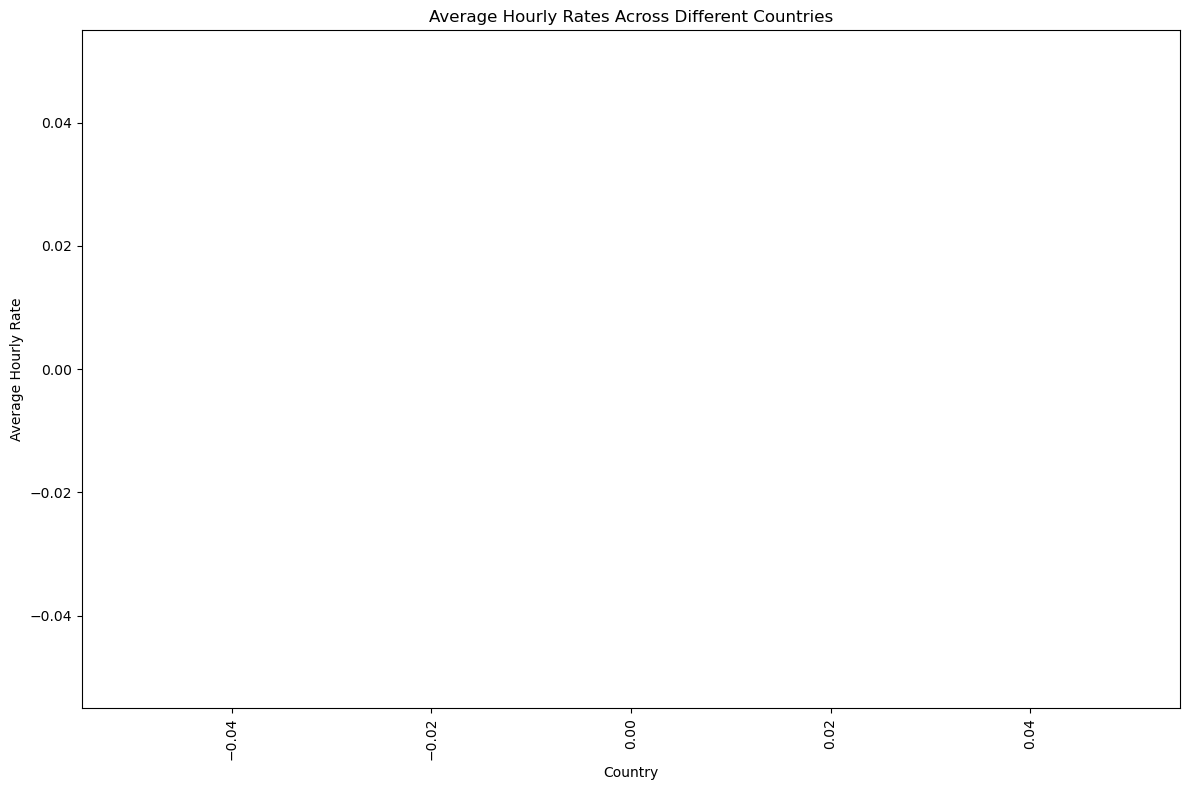

In [45]:
plt.figure(figsize=(12, 8))
plt.bar(average_hourly_rates['country'], average_hourly_rates['hourly_high'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Hourly Rate')
plt.title('Average Hourly Rates Across Different Countries')
plt.tight_layout()
plt.show()

In [46]:
!pip install folium

In [47]:
import folium

In [48]:
world_map = folium.Map(zoom_start=2)

In [ ]:
folium.Choropleth(
    geo_data='world.geojson',
    name='choropleth',
    data=average_hourly_rates,
    columns=['country', 'hourly_rate'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Hourly Rates'
).add_to(world_map)

In [ ]:
world_map.save('hourly_rates_map.html')

In [49]:
#Task 5: Create a job recommendation engine based on current job postings
df1 = pd.read_csv('all_upwork_jobs_2024-02-07-2024-03-24.csv')

In [50]:
df1

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [51]:
print(df1.head())

                                               title  \
0  Experienced Media Buyer For Solar Pannel and R...   
1                               Full Stack Developer   
2                                    SMMA Bubble App   
3             Talent Hunter Specialized in Marketing   
4                                      Data Engineer   

                                                link  \
0  https://www.upwork.com/jobs/Experienced-Media-...   
1  https://www.upwork.com/jobs/Full-Stack-Develop...   
2  https://www.upwork.com/jobs/SMMA-Bubble-App_%7...   
3  https://www.upwork.com/jobs/Talent-Hunter-Spec...   
4  https://www.upwork.com/jobs/Data-Engineer_%7E0...   

              published_date  is_hourly  hourly_low  hourly_high  budget  \
0  2024-02-17 09:09:54+00:00      False         NaN          NaN   500.0   
1  2024-02-17 09:09:17+00:00      False         NaN          NaN  1100.0   
2  2024-02-17 09:08:46+00:00       True        10.0         30.0     NaN   
3  2024-02-17 09:08:08

In [52]:
df2 = df1.sample(frac=0.1, random_state=42)

In [53]:
df2

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
33378,"Experienced Frontend Developer (Nuxt.js, Vue.j...",https://www.upwork.com/jobs/Experienced-Fronte...,2024-02-14 11:05:21+00:00,True,8.0,20.0,NaN,Netherlands
168784,Social Media Content Designer,https://www.upwork.com/jobs/Social-Media-Conte...,2024-03-08 16:32:09+00:00,False,NaN,NaN,725.0,Honduras
125912,Italian market analysis,https://www.upwork.com/jobs/Italian-market-ana...,2024-03-07 07:20:46+00:00,False,NaN,NaN,50.0,Croatia
208341,Cash Cow/Powtoon YouTube Video Creator,https://www.upwork.com/jobs/Cash-Cow-Powtoon-Y...,2024-03-16 12:07:26+00:00,False,NaN,NaN,20.0,Hong Kong
77985,Changing a MVC Razor View programatically,https://www.upwork.com/jobs/Changing-MVC-Razor...,2024-02-24 11:33:47+00:00,True,25.0,50.0,NaN,Ireland
...,...,...,...,...,...,...,...,...
31211,Organizational Development Consulting Firms,https://www.upwork.com/jobs/Organizational-Dev...,2024-02-15 22:12:25+00:00,True,15.0,25.0,NaN,United States
241475,App development for CCTV and Alarm System,https://www.upwork.com/jobs/App-development-fo...,2024-03-23 02:01:56+00:00,False,NaN,NaN,200.0,United Kingdom
206331,I need a experienced Amazon PPC specialist.,https://www.upwork.com/jobs/need-experienced-A...,2024-03-23 20:28:02+00:00,True,3.0,5.0,NaN,United States
138725,Script Writer For YouTube Channel Needed,https://www.upwork.com/jobs/Script-Writer-For-...,2024-03-05 22:40:47+00:00,False,NaN,NaN,35.0,Germany


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import lil_matrix

In [55]:
vectorizer = TfidfVectorizer(stop_words='english')

In [56]:
tfidf_matrix = vectorizer.fit_transform(df2['title'].values.astype('U'))

In [57]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [58]:
def get_recommendations(title, cosine_sim=cosine_sim, df2=df2, top_n=5):
    # Get index of the job title
    idx = df2[df2['title'] == title].index[0]

In [59]:
idx = 0

In [60]:
sim_scores = list(enumerate(cosine_sim[idx]))

In [61]:
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

In [62]:
top_n = 5

In [63]:
sim_scores = sim_scores[1:top_n+1]

In [64]:
job_indices = [i[0] for i in sim_scores]
recommended_jobs = df2.iloc[job_indices]['title'].values

In [65]:
from flask import Flask, jsonify, request

In [66]:
app = Flask(__name__)

In [67]:
def recommend_jobs():
    df2 = request.get_json()
    title = df2['title']
    recommended_jobs = get_recommendations(title)
    return jsonify({'recommended_jobs': recommended_jobs.tolist()})

In [68]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Rakesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [69]:
# Task 6: Track changes in job market dynamics over months
df1

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [70]:
df1['published_date'] = pd.to_datetime(df1['published_date'], utc=True).dt.tz_localize(None)

In [71]:
df1['month_year'] = df1['published_date'].dt.to_period('M')

In [72]:
print(df1.head())

                                               title  \
0  Experienced Media Buyer For Solar Pannel and R...   
1                               Full Stack Developer   
2                                    SMMA Bubble App   
3             Talent Hunter Specialized in Marketing   
4                                      Data Engineer   

                                                link      published_date  \
0  https://www.upwork.com/jobs/Experienced-Media-... 2024-02-17 09:09:54   
1  https://www.upwork.com/jobs/Full-Stack-Develop... 2024-02-17 09:09:17   
2  https://www.upwork.com/jobs/SMMA-Bubble-App_%7... 2024-02-17 09:08:46   
3  https://www.upwork.com/jobs/Talent-Hunter-Spec... 2024-02-17 09:08:08   
4  https://www.upwork.com/jobs/Data-Engineer_%7E0... 2024-02-17 09:07:42   

   is_hourly  hourly_low  hourly_high  budget        country month_year  
0      False         NaN          NaN   500.0            NaN    2024-02  
1      False         NaN          NaN  1100.0  United Stat

In [73]:
monthly_counts = df1.groupby('month_year').size().reset_index(name='job_count')

In [74]:
import plotly.express as px

In [75]:
df1['month_year'] = df1['month_year'].astype(str)

In [76]:
json_data = df1.to_json(orient='records')

In [77]:
import json

In [ ]:
fig = px.line(monthly_counts, x='month_year', y='job_count', title='Monthly Job Market Dynamics')
fig.update_xaxes(title='Month-Year', tickangle=45)
fig.update_yaxes(title='Number of Job Postings')
fig.show()

In [78]:
# Task 7: Investigate trends in the remote work landscape
print(df1.head())

                                               title  \
0  Experienced Media Buyer For Solar Pannel and R...   
1                               Full Stack Developer   
2                                    SMMA Bubble App   
3             Talent Hunter Specialized in Marketing   
4                                      Data Engineer   

                                                link      published_date  \
0  https://www.upwork.com/jobs/Experienced-Media-... 2024-02-17 09:09:54   
1  https://www.upwork.com/jobs/Full-Stack-Develop... 2024-02-17 09:09:17   
2  https://www.upwork.com/jobs/SMMA-Bubble-App_%7... 2024-02-17 09:08:46   
3  https://www.upwork.com/jobs/Talent-Hunter-Spec... 2024-02-17 09:08:08   
4  https://www.upwork.com/jobs/Data-Engineer_%7E0... 2024-02-17 09:07:42   

   is_hourly  hourly_low  hourly_high  budget        country month_year  
0      False         NaN          NaN   500.0            NaN    2024-02  
1      False         NaN          NaN  1100.0  United Stat

In [79]:
remote_vs_onsite = df1.groupby(['month_year', 'country']).size().reset_index(name='job_count')

In [80]:
remote_jobs = remote_vs_onsite[remote_vs_onsite['country'] == 'remote']

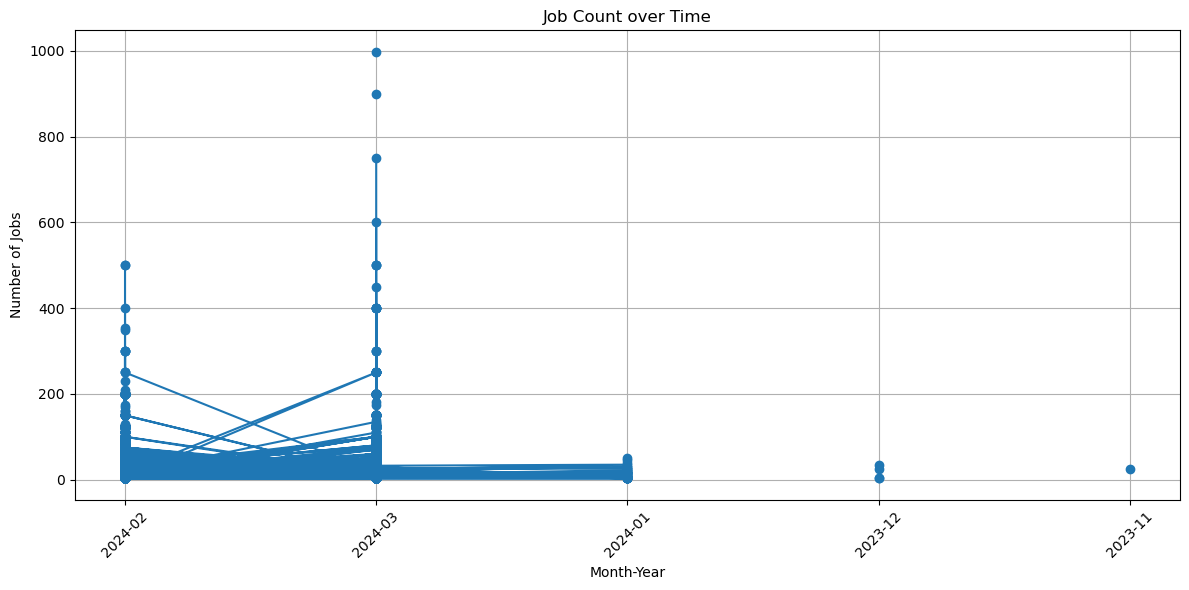

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(df1['month_year'], df1['hourly_low'], marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Number of Jobs')
plt.title('Job Count over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [83]:
result = seasonal_decompose(remote_jobs.set_index('month_year')['country'], model='additive', period=12)

ValueError: x must have 2 complete cycles requires 24 observations. x only has 0 observation(s)

NameError: name 'result' is not defined

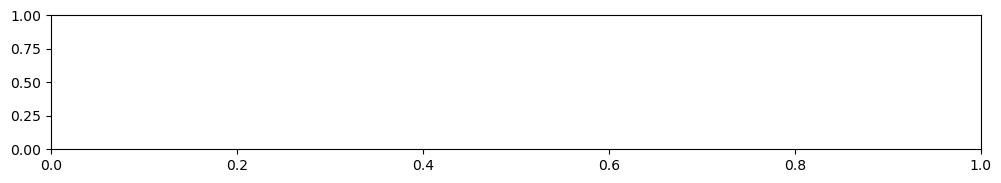

In [84]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [85]:
# Task 8: Predict future job market trends
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [86]:
print(df1.head())

                                               title  \
0  Experienced Media Buyer For Solar Pannel and R...   
1                               Full Stack Developer   
2                                    SMMA Bubble App   
3             Talent Hunter Specialized in Marketing   
4                                      Data Engineer   

                                                link      published_date  \
0  https://www.upwork.com/jobs/Experienced-Media-... 2024-02-17 09:09:54   
1  https://www.upwork.com/jobs/Full-Stack-Develop... 2024-02-17 09:09:17   
2  https://www.upwork.com/jobs/SMMA-Bubble-App_%7... 2024-02-17 09:08:46   
3  https://www.upwork.com/jobs/Talent-Hunter-Spec... 2024-02-17 09:08:08   
4  https://www.upwork.com/jobs/Data-Engineer_%7E0... 2024-02-17 09:07:42   

   is_hourly  hourly_low  hourly_high  budget        country month_year  
0      False         NaN          NaN   500.0            NaN    2024-02  
1      False         NaN          NaN  1100.0  United Stat

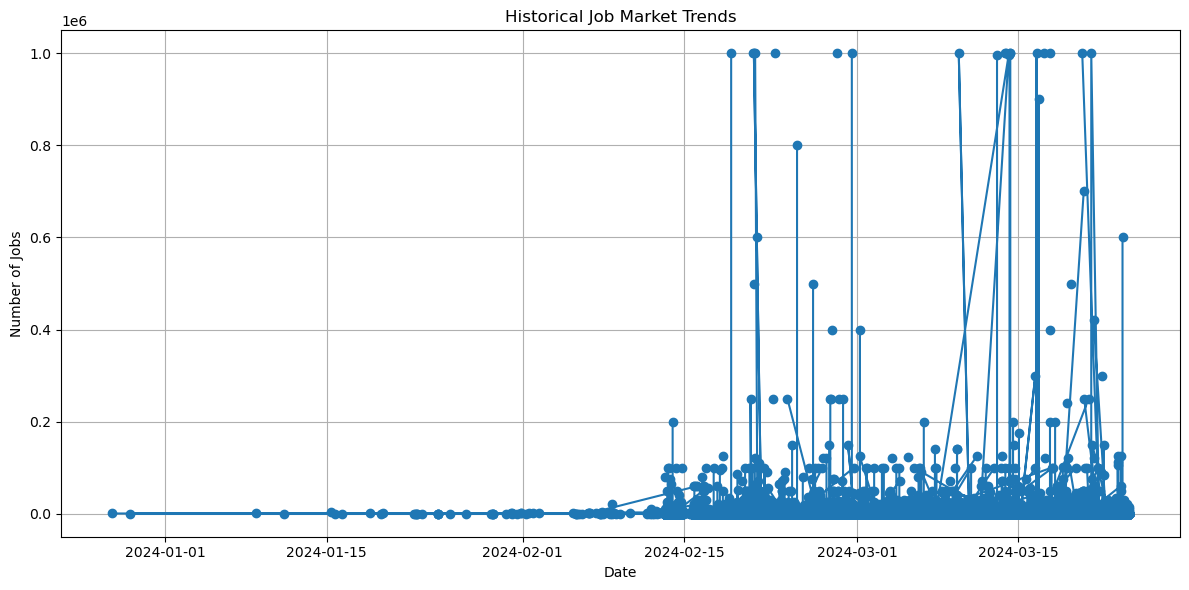

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(df1['published_date'], df1['budget'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Jobs')
plt.title('Historical Job Market Trends')
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
model = ExponentialSmoothing(df2['budget'], seasonal='add', seasonal_periods=12)
model_fit = model.fit()

C:\Users\Rakesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rakesh\anaconda3\lib\site-packages\statsmodels\tsa\exponential_smoothing\initialization.py:95: RuntimeWarning: Mean of empty slice
  initial_seasonal = np.nanmean(


ValueError: shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)